# Exploratory Data Analysis


#### Data dictionary 
https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The cleaned datafram contained over 29 million rows, I randomly sampled this down to 100 thousand.
df = pd.read_csv('data/sample_df_100k.csv')

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-11 14:05:48,2017-03-11 14:12:34,1,1.26,1,0,262,237,2,6.5,0.0,0.5,0.00,0.0,0.3,7.30
1,1,2017-06-08 12:59:56,2017-06-08 13:03:49,1,0.70,1,0,262,140,1,5.0,0.0,0.5,1.15,0.0,0.3,6.95
2,2,2017-06-08 09:08:45,2017-06-08 09:12:59,6,0.81,1,0,237,141,2,5.0,0.0,0.5,0.00,0.0,0.3,5.80
3,1,2017-03-18 13:12:23,2017-03-18 13:17:35,1,0.70,1,0,113,234,1,5.5,0.0,0.5,10.00,0.0,0.3,16.30
4,2,2017-03-05 01:12:35,2017-03-05 01:26:06,3,3.18,1,0,114,50,1,12.5,0.5,0.5,2.76,0.0,0.3,16.56


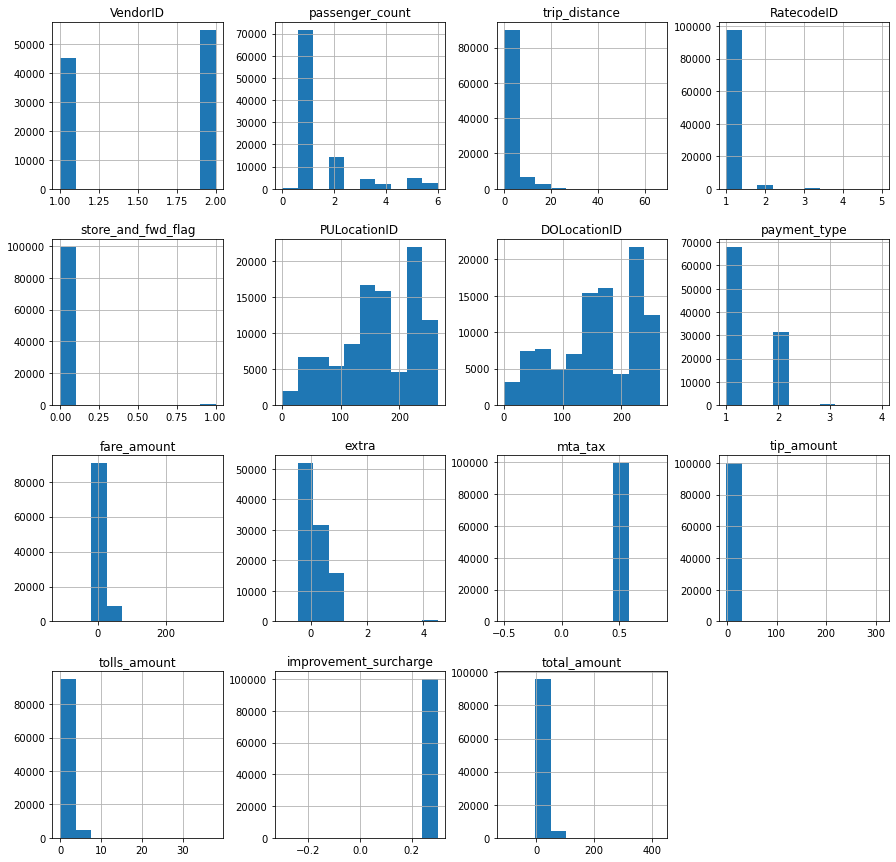

In [4]:
df_hist = df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis = 1)
ax = df_hist.hist(figsize = (15,15))
plt.show()

In [5]:
# from the histogram it appeas mta_tax and improvement_surcharge are set rates
# after double checking the data disctionary this is confirmed
# if the rate is the same for everyone they will not provide any additional information and will be dropped.

df = df.drop(['mta_tax', 'improvement_surcharge'], axis = 1)

In [6]:
# 'store_and_fwd_flag' is also not useful for predicting tip ammount
df = df.drop('store_and_fwd_flag', axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   RatecodeID             100000 non-null  int64  
 6   PULocationID           100000 non-null  int64  
 7   DOLocationID           100000 non-null  int64  
 8   payment_type           100000 non-null  int64  
 9   fare_amount            100000 non-null  float64
 10  extra                  100000 non-null  float64
 11  tip_amount             100000 non-null  float64
 12  tolls_amount           100000 non-null  float64
 13  total_amount           100000 non-null  float64
dtypes: float64(6), int64(6), object(2)
me

In [8]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

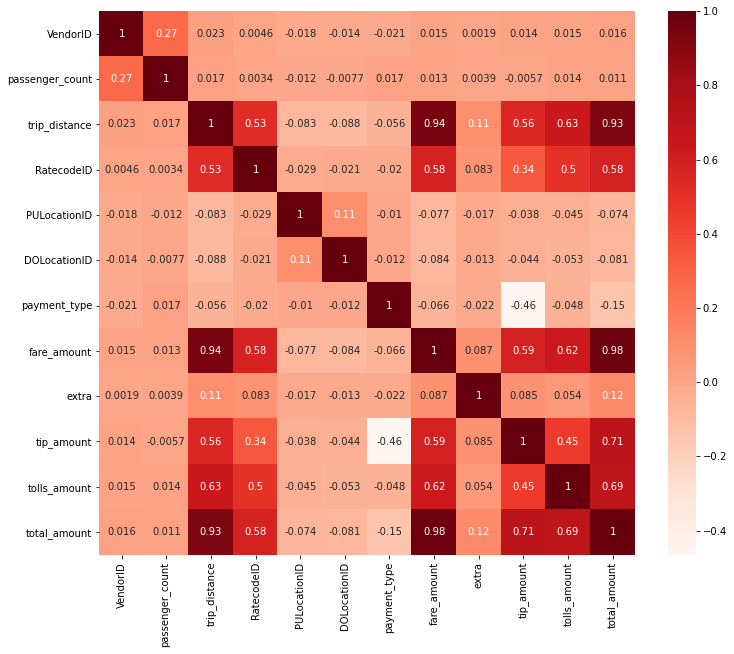

In [9]:
def correlation_heatmap(dataframe):
    """
    function that creates a heatmap showing the correlation of features
    """
    plt.figure(figsize=(12,10))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    
correlation_heatmap(df)

# strong correlations between fare_amount, trip_distance and total_amount, may consider removing fare_amount due to redundancy
# negative correlation between tips and payment type is due to charge backs, this will be removed.

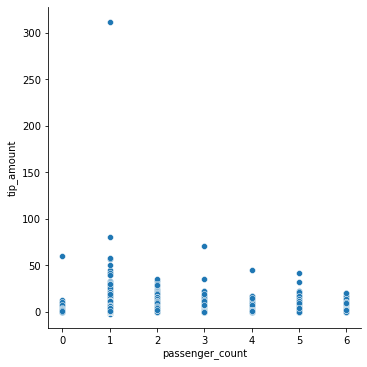

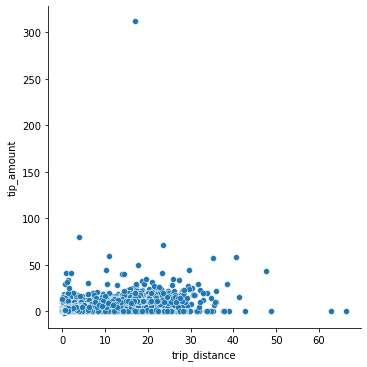

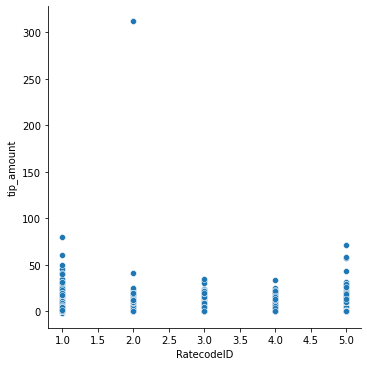

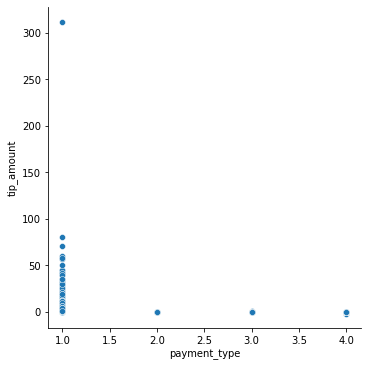

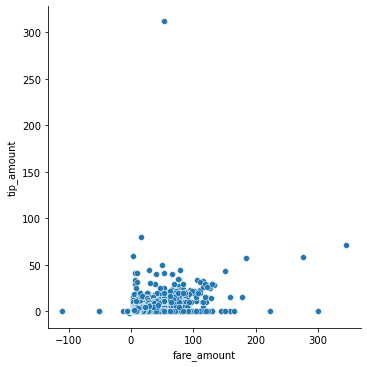

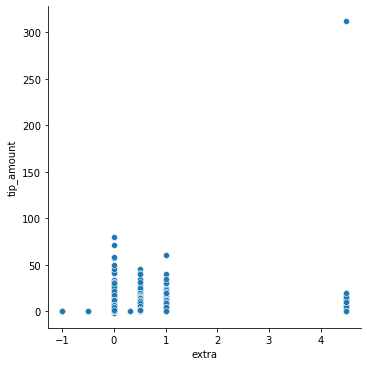

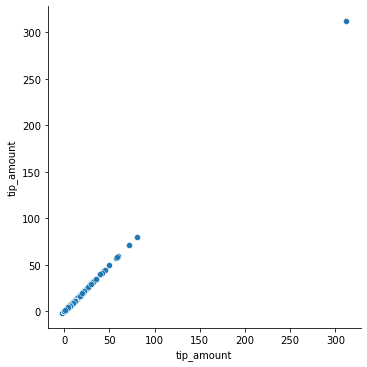

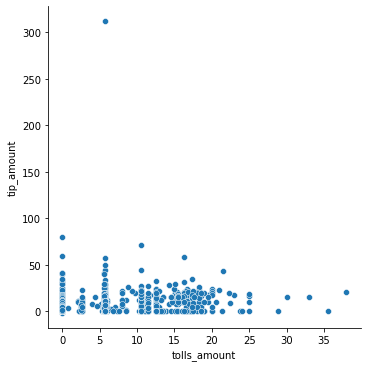

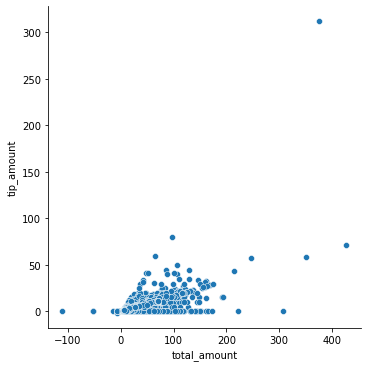

In [10]:
columns = ['passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount']


for i in columns:
    
    sns.relplot(data=df, x=i, y="tip_amount",)
    plt.show()
    
# The relplots shows a few notable things
#There is likely an outlier with one users tip ammount, likely they added a 0 by accident and tipped 300 instead of 30, or 3
# There is no tips for any tip method other than 1, this makes sense after looking at the data dictionary
# There are negative values for fare_amount, extra and total amount, this is likely due to chargebacks, these will be removed.

In [11]:
#remove any total_amounts that are less that 0
df = df[df['total_amount'] > 0] 

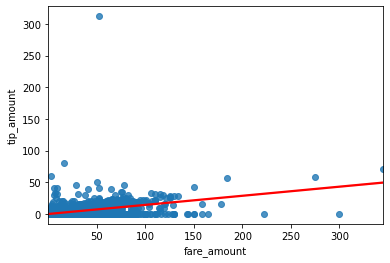

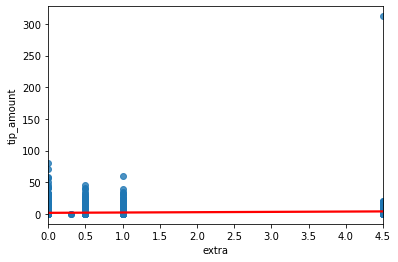

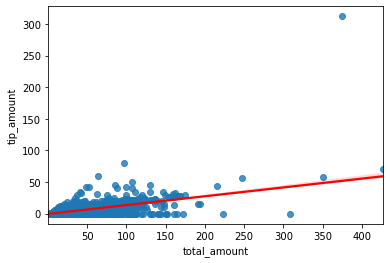

In [17]:
negative_columns = ['fare_amount', 'extra', 'total_amount']

for i in negative_columns:
    
    sns.regplot(data=df, x=i, y="tip_amount", line_kws={"color": "red"})
    plt.show()
    
#there are no negative values now
# Little correlation between extras and tip ammount and a positive correlation between tip_amount and fare_amount/total_amount

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99953 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               99953 non-null  int64  
 1   tpep_pickup_datetime   99953 non-null  object 
 2   tpep_dropoff_datetime  99953 non-null  object 
 3   passenger_count        99953 non-null  int64  
 4   trip_distance          99953 non-null  float64
 5   RatecodeID             99953 non-null  int64  
 6   PULocationID           99953 non-null  int64  
 7   DOLocationID           99953 non-null  int64  
 8   payment_type           99953 non-null  int64  
 9   fare_amount            99953 non-null  float64
 10  extra                  99953 non-null  float64
 11  tip_amount             99953 non-null  float64
 12  tolls_amount           99953 non-null  float64
 13  total_amount           99953 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 11.4+

In [19]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
count,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000,99953.000000
mean,1.548558,1.624003,2.944481,1.032795,163.106780,160.887627,1.325423,13.011072,0.336872,1.881437,0.324772,16.356383
std,0.497639,1.264334,3.733554,0.234246,66.964348,70.387245,0.484946,11.058527,0.457259,2.712111,1.482291,13.865592
min,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.310000
25%,1.000000,1.000000,1.000000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.000000,0.000000,8.750000
50%,2.000000,1.000000,1.640000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,1.440000,0.000000,11.800000
75%,2.000000,2.000000,3.050000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,2.460000,0.000000,17.800000
max,2.000000,6.000000,66.400000,5.000000,265.000000,265.000000,4.000000,345.000000,4.500000,312.000000,38.000000,426.960000


In [20]:
df.to_csv('data/eda_output.csv')